# Overplotting HEK feature/event polygons on a map

- https://docs.sunpy.org/en/stable/generated/gallery/plotting/overplot_hek_polygon.html

How to overplot HEK outlines on a map.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.time import TimeDelta

import sunpy.data.sample
import sunpy.map
from sunpy.coordinates import frames
from sunpy.net import attrs as a
from sunpy.net import hek
from sunpy.physics.differential_rotation import solar_rotate_coordinate
from sunpy.time import parse_time

We start with the sample data.

In [ ]:
aia_map = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE)

In [ ]:
aia_map.date

<Time object: scale='utc' format='isot' value=2011-06-07T06:33:02.770>

Look for coronal holes detected using the SPoCA feature recognition method:

In [ ]:
hek_client = hek.HEKClient()
start_time = aia_map.date - TimeDelta(2*u.hour)
end_time = aia_map.date + TimeDelta(2*u.hour)
responses = hek_client.search(a.Time(start_time, end_time),
                              a.hek.CH, a.hek.FRM.Name == 'SPoCA')

Let's find the biggest coronal hole within 80 degrees north/south of the
equator:

In [ ]:
area = 0.0
for i, response in enumerate(responses):
    if response['area_atdiskcenter'] > area and np.abs(response['hgc_y']) < 80.0:
        area = response['area_atdiskcenter']
        response_index = i

Next let's get the boundary of the coronal hole.

In [ ]:
ch = responses[response_index]
p1 = ch["hpc_boundcc"][9:-2]
p2 = p1.split(',')
p3 = [v.split(" ") for v in p2]
p3

[['-509.7', '-786.3'],
 ['-508.5', '-785.7'],
 ['-503.7', '-771.9'],
 ['-467.1', '-770.1'],
 ['-416.7', '-800.1'],
 ['-386.7', '-787.5'],
 ['-371.1', '-814.5'],
 ['-407.7', '-816.9'],
 ['-382.5', '-849.3'],
 ['-357.9', '-858.3'],
 ['-333.3', '-823.5'],
 ['-286.5', '-836.7'],
 ['-308.7', '-844.5'],
 ['-305.7', '-864.9'],
 ['-254.7', '-899.1'],
 ['-206.1', '-879.9'],
 ['-211.5', '-838.5'],
 ['-149.7', '-843.3'],
 ['-182.7', '-870.3'],
 ['-171.3', '-882.9'],
 ['-86.1', '-872.7'],
 ['-81.9', '-828.9'],
 ['-104.7', '-810.9'],
 ['-38.1', '-758.7'],
 ['-56.7', '-830.1'],
 ['-14.1', '-849.9'],
 ['-61.5', '-869.7'],
 ['-65.7', '-886.5'],
 ['15.9', '-918.3'],
 ['-30.9', '-923.1'],
 ['-18.9', '-937.5'],
 ['63.9', '-942.3'],
 ['-88.5', '-940.5'],
 ['-246.9', '-911.7'],
 ['-417.3', '-847.5'],
 ['-509.7', '-786.3']]

In [ ]:
p4 = [(float(v[0]), float(v[1])) * u.arcsec for v in p3]
p4

[<Quantity [-509.7, -786.3] arcsec>,
 <Quantity [-508.5, -785.7] arcsec>,
 <Quantity [-503.7, -771.9] arcsec>,
 <Quantity [-467.1, -770.1] arcsec>,
 <Quantity [-416.7, -800.1] arcsec>,
 <Quantity [-386.7, -787.5] arcsec>,
 <Quantity [-371.1, -814.5] arcsec>,
 <Quantity [-407.7, -816.9] arcsec>,
 <Quantity [-382.5, -849.3] arcsec>,
 <Quantity [-357.9, -858.3] arcsec>,
 <Quantity [-333.3, -823.5] arcsec>,
 <Quantity [-286.5, -836.7] arcsec>,
 <Quantity [-308.7, -844.5] arcsec>,
 <Quantity [-305.7, -864.9] arcsec>,
 <Quantity [-254.7, -899.1] arcsec>,
 <Quantity [-206.1, -879.9] arcsec>,
 <Quantity [-211.5, -838.5] arcsec>,
 <Quantity [-149.7, -843.3] arcsec>,
 <Quantity [-182.7, -870.3] arcsec>,
 <Quantity [-171.3, -882.9] arcsec>,
 <Quantity [ -86.1, -872.7] arcsec>,
 <Quantity [ -81.9, -828.9] arcsec>,
 <Quantity [-104.7, -810.9] arcsec>,
 <Quantity [ -38.1, -758.7] arcsec>,
 <Quantity [ -56.7, -830.1] arcsec>,
 <Quantity [ -14.1, -849.9] arcsec>,
 <Quantity [ -61.5, -869.7] arcsec>,
 

In [ ]:
ch_date = parse_time(ch['event_starttime'])
ch_date

<Time object: scale='utc' format='iso' value=2011-06-07 06:00:08.000>

In [ ]:
ch_boundary = SkyCoord(
    p4,
    obstime=ch_date, 
    observer="earth",
    frame=frames.Helioprojective
)

In [ ]:
ch_boundary

<SkyCoord (Helioprojective: obstime=2011-06-07 06:00:08.000, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate for 'earth'>): (Tx, Ty) in arcsec
    [(-509.7, -786.3), (-508.5, -785.7), (-503.7, -771.9),
     (-467.1, -770.1), (-416.7, -800.1), (-386.7, -787.5),
     (-371.1, -814.5), (-407.7, -816.9), (-382.5, -849.3),
     (-357.9, -858.3), (-333.3, -823.5), (-286.5, -836.7),
     (-308.7, -844.5), (-305.7, -864.9), (-254.7, -899.1),
     (-206.1, -879.9), (-211.5, -838.5), (-149.7, -843.3),
     (-182.7, -870.3), (-171.3, -882.9), ( -86.1, -872.7),
     ( -81.9, -828.9), (-104.7, -810.9), ( -38.1, -758.7),
     ( -56.7, -830.1), ( -14.1, -849.9), ( -61.5, -869.7),
     ( -65.7, -886.5), (  15.9, -918.3), ( -30.9, -923.1),
     ( -18.9, -937.5), (  63.9, -942.3), ( -88.5, -940.5),
     (-246.9, -911.7), (-417.3, -847.5), (-509.7, -786.3)]>

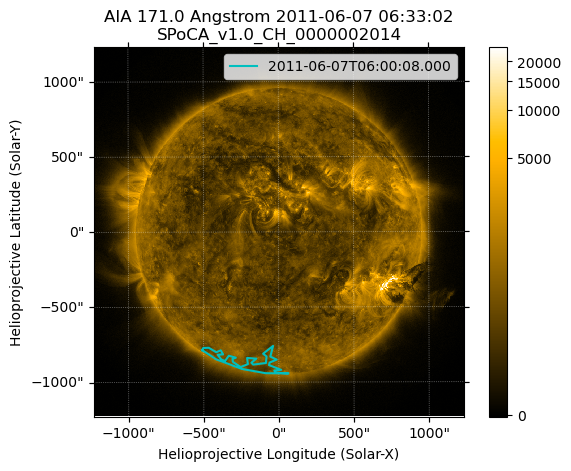

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection=aia_map)
aia_map.plot(axes=ax, clip_interval=(1, 99.99)*u.percent)
ax.plot_coord(ch_boundary, color='c', label=f"{ch_date.isot}")
ax.set_title('{:s}\n{:s}'.format(aia_map.name, ch['frm_specificid']))
ax.legend()
plt.colorbar()
plt.show()

The coronal hole was detected at different time than the AIA image was
taken so we need to rotate it to the map observation time.

In [ ]:
rotated_ch_boundary = solar_rotate_coordinate(ch_boundary, time=aia_map.date)
rotated_ch_boundary

2024-12-31 22:30:03 - sunpy - WARNING: SunpyUserWarning: Using 'time' assumes an Earth-based observer.


<SkyCoord (Helioprojective: obstime=2011-06-07T06:33:02.770, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2011-06-07T06:33:02.770, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, AU)
    (0., 0.03652003, 1.01484379)>): (Tx, Ty, distance) in (arcsec, arcsec, AU)
    [(-509.13242966, -786.31381287, 1.01421292),
     (-507.89492712, -785.71419659, 1.01417139),
     (-502.74551962, -771.91781279, 1.01379234),
     (-465.79962684, -770.12082037, 1.01341368),
     (-415.44734697, -800.11961209, 1.01343713),
     (-385.12858272, -787.52238352, 1.01309588),
     (-369.7680371 , -814.51973863, 1.01333194),
     (-406.6253334 , -816.9176105 , 1.01362161),
     (-381.80684374, -849.31299675, 1.0140356 ),
     (-357.17676264, -858.31289972, 1.01399376),
     (-331.89652745, -823.51988943, 1.01323961),
     (-285.06648129, -836.7194534 , 1.01318759),
     (-307.45359907, -844.51784652, 1.0133941 ),
     (-304.73956117, -864.91466571, 1.01370684),
     (-254.11457194, -

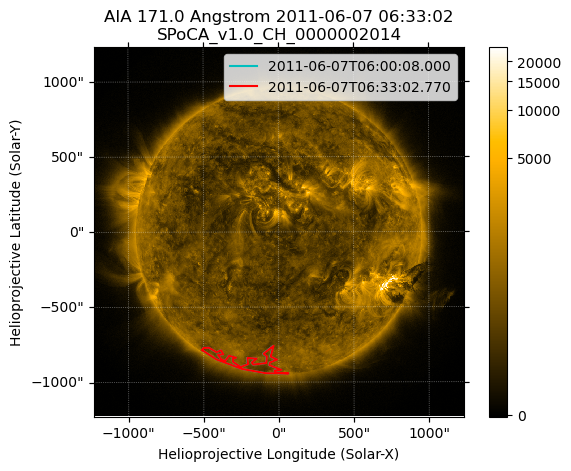

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection=aia_map)
aia_map.plot(axes=ax, clip_interval=(1, 99.99)*u.percent)
ax.plot_coord(ch_boundary, color='c', label=f"{ch_date.isot}")
ax.plot_coord(rotated_ch_boundary, color='r', label=f"{aia_map.date.isot}")
ax.set_title('{:s}\n{:s}'.format(aia_map.name, ch['frm_specificid']))
ax.legend()
plt.colorbar()
plt.show()

In [ ]:
bottom_left = [-600, -1000] * u.arcsec
top_right = [100, -600] * u.arcsec
aia_smap = aia_map.submap(SkyCoord(*bottom_left,
                                   frame=aia_map.coordinate_frame),
                          top_right=SkyCoord(*top_right,
                                             frame=aia_map.coordinate_frame))

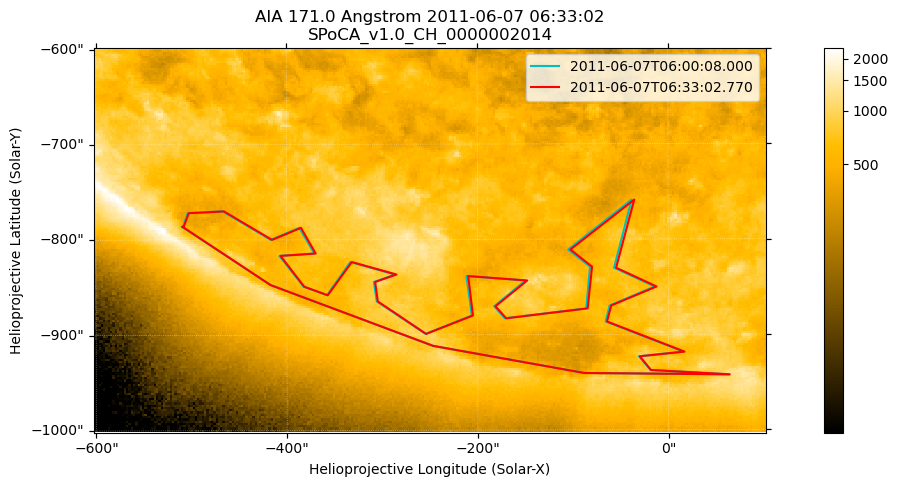

In [ ]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(projection=aia_smap)
aia_smap.plot(axes=ax, clip_interval=(1, 99.99)*u.percent)
ax.plot_coord(ch_boundary, color='c', label=f"{ch_date.isot}")
ax.plot_coord(rotated_ch_boundary, color='r', label=f"{aia_map.date.isot}")
ax.set_title('{:s}\n{:s}'.format(aia_smap.name, ch['frm_specificid']))
ax.legend()
plt.colorbar()
plt.show()